## Mod 2 Project Submission

Please fill out:
* Student name: Andro Tikvica
* Student pace: Self-Paced
* Scheduled project review date/time: Tuesday, December 15, 2020 15:00
* Instructor name: Jeff Herman
* Blog post URL: 


## Introduction

### Objective

The aim of this project is to accurately predict the sales price of houses in King County, Wsahington using Multiple Linear Regression. 

### Outline

This jupyter notebook will be split into five main sections using the OSEMiN Data Science Workflow:

**1. Obtain** - This will include importing the data and inspecting it in its raw format. 

**2. Scrub** - Cleaning the data: filling missing values, changing data types and fixing any other issues with the data.

**3. Explore** - Conduct Exploratory Data Analysis. Much of what we find in this step will form part of Data Cleaning and Preprocessing.

**4. Model** - Here we will build a predictive model using linear regression. 

**5. Interpret** - What did we find and how confident can we be in those findings?


#### Import Packages

In [36]:
import numpy as np # for numbers and stuff
import pandas as pd # for creating and manipulating tables
import datetime # to convert strings to datetime
from scipy import stats # to calculate zscore to remove outliers
pd.set_option('display.max_rows', None) # to extend the number of rows that show in a data frame
from collections import Counter # to count occurrences of genres
import matplotlib.pyplot as plt # for creating visualizations
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns # to simplify complex visualizations
sns.set(style="white") # uses a minimalist backdrop for sns plots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE

import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

import pickle

## Obtain - Data Load and Inspection

DESCRIPTION

In [37]:
# Load dataset in as a Pandas Dataframe
kc = pd.read_csv("kc_house_data.csv")
# Make sure that all columns will be shown
pd.set_option('display.max_columns', None)
# Display first five lines of the dataframe
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [38]:
# The Kaggle Database for reference
df_kag = pd.read_csv('kc_house_data_actual.csv')
df_kag.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Column Names and descriptions for Kings County Data Set
* **id** - unique identifier for a house (May appear multiple times if that house is sold multiple times within the dataset)
* **dateDate** - Date of Sale (format: mm/dd/yyyy)
* **pricePrice** -  Price of Sale (Dependant Variable)
* **bedroomsNumber** -  Number of Bedrooms
* **bathroomsNumber** -  Number of bathrooms
* **sqft_livingsquare** -  Total square footage of living space
* **sqft_lotsquare** -  Total square footage of the lot
* **floorsTotal** -  NUmber of floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Rating of the property's view on a scale from 0 to 5 POSSIBLE THAT 0 IS A NON RATING AND THAT IT IS ONLY FROM 1 TO 5
* **condition** - How good the condition is (Overall) on a scale of 1 to 5
* **grade** - Overall grade given to the housing unit, based on King County grading system
* **sqft_above** - Square footage of house apart from basement
* **sqft_basement** - Square footage of the basement
* **yr_built** - Year Built
* **yr_renovated** - Year when house was renovated, 0.0 if never renovated
* **zipcode** - Zipcode of the Property
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [39]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [40]:
# Look at what datatypes and the amount of null values we will be working with
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [41]:
# Show the number of unique values in each column
kc.nunique()
# This will form part of the variable split in the next section
# There are, apparently, some doubles because there are fewer unique id's than total rows

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [42]:
# Checking the duplicate ID's. Only printing the highest for succinctness
print(kc['id'].value_counts()[:1])
# Check the instance with the highest number of repetitions
kc.loc[kc['id'] == 795000620]
# These are not duplicates but rather multiple sales of the same house
# Therefore date is date of sale

795000620    3
Name: id, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,2,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


#### Splitting Variables

Dependent Variable: Sale Price

Independent Vasriables: Everything else excluding "id" and possibly "date"

In [43]:
# Categoricals are where there a finite number of distinct groups.
categoricals = ['grade', 'zipcode', 'condition', 'waterfront', 'view', 'yr_renovated',
               'bedrooms', 'bathrooms', 'floors',]
# Discrete
discrete = ['lat', 'long']

# Continuous
continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 
              'sqft_basement', 'sqft_lot15', 'sqft_living15',
              'yr_built']

neither = ['date']

len(categoricals) + len(discrete) + len(continuous) + len(neither)

20

In [44]:
# Checking that every columns except 'id' has been seperated out
left = [i for i in kc.columns if i not in neither]
left = [i for i in left if i not in categoricals]
left = [i for i in left if i not in discrete]
left = [i for i in left if i not in continuous]
print(len(left))
left

1


['id']

## Scrub -  Data Cleaning

I also want to make a note of the fact that I am aware that I could have downloaded the dataset fresh from Kaggle and avoided doing a portion of this cleaning, but I appreciate the challenge and recognize the iportance of being able to recognize discrepancies in the data you are working with. *pats self on the back

In [45]:
kc_clean = kc.copy()
# Drop NaN values from 'view'
kc_clean.dropna(axis = 0, subset = ['view'], inplace = True)
# Change view column to int, it is a range of 0 to 5 only using whole  numbers
kc_clean["view"] = kc_clean["view"].map(lambda x: int(x))
# Drop rows where sqft_basement == ?
sqft_basement_to_drop = kc_clean['sqft_basement'].loc[kc_clean['sqft_basement'] == "?"].index
kc_clean.drop(labels = sqft_basement_to_drop, inplace = True)
# Fill remaining NaN with 0.0; only waterfront and yr_renovated are left with NaN both of which use 0 to signify that the answer is negative making this solution appropriate
kc_clean.fillna(0.0, inplace = True)
# Change date to datetime so its usable 
kc_clean['date'] = kc_clean['date'].map(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))
# Change various columns to int for ease of operation
for i in ['price', 'waterfront', 'sqft_basement', 'yr_renovated']:
    kc_clean[i] = kc_clean[i]. map(lambda x: int(float(x)))
# Dropping outlier for bedrooms: 33 bedrooms when the next highest is 
kc_clean.drop(15856, inplace = True)
# bathrooms, floors, lat, and long have to stay as float as they utilize decimal poimts in a significant manner
# Check that it was succesful with .info()
# kc_clean.info()
kc_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
kc_clean.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108100e+04,2.108100e+04,21081.000000,21081.000000,21081.000000,2.108100e+04,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000,21081.000000
mean,4.582897e+09,5.402422e+05,3.370998,2.115934,2080.381813,1.507802e+04,1.493644,0.006688,0.233338,3.409753,7.657749,1789.035530,291.346283,1971.024477,68.362601,98077.857644,47.560365,-122.213838,1986.948579,12732.895166
std,2.876452e+09,3.667404e+05,0.902228,0.768156,917.872690,4.117431e+04,0.539372,0.081511,0.765083,0.650520,1.173709,828.372939,442.013871,29.323349,363.037878,53.529758,0.138569,0.140608,685.545579,27149.369147
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471300,-122.328000,1490.000000,5100.000000
50%,3.904980e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10089.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Preprocessing - A Combination of Data Cleaning and Exploration

Now that the data is cleaned and usable throughout, it is time to apply statistical and mathematical processes to gain insight into the relationships of the data and to determine which avenues are likely to offer the best insights. 

This section has elements of the second and third step of OSEMiN but I have seperated it out as I find it to be the intersection between the two categories, having elements of both. I do not think it is purely exploratory as the data will be cleaned and cut based on the information found, and neither do i think normalization and one-hot encoding falls within either of the categories alone. 

### Multicollinearity

Multicollinearity occurs when two or more independant variables are highly linearly correlatied possibly undermining the significance of these independant variables. This may cause the multiple regression to change erratically with small changes in the data. Below we will use a Pearson Correlation Matrix through seaborn's heatmap function to see whether and of the numerical features of this dataset are highly correlated

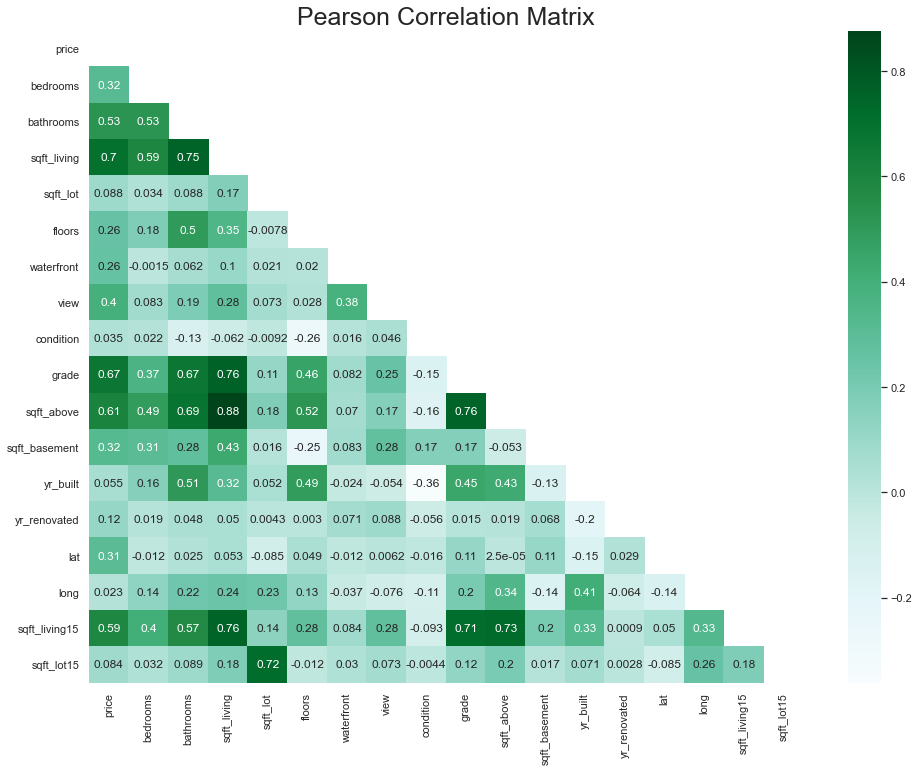

In [47]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

mask = np.zeros_like(kc_clean[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(kc_clean[features].corr(),annot=True, cmap='BuGn', 
            linecolor="w", mask = mask)

Based on the chart there are a few standout correlations that indicate multicollinearity and we need to consider:

**sqft_living15 w/ sqft_living, and sqft_lot15 w/ sqft_lot** - 
These both have a correlation higher than .7 as it seems that most houses can be found near similarly sized houses, so these two categories will be removed in favor of keeping sqft_living.

**sqft_above w/ sqft_living** - .88 correlation is very high and sqft_above will be removed as it only represents a portion of the sqft_living measurement.

**bathrooms w/ multiple features** - bathrooms will be dropped as it has multiple correlations of higher than .5. Furthermore I see this as a valid point to slim down the features we are comparing for the sake of limiting features.


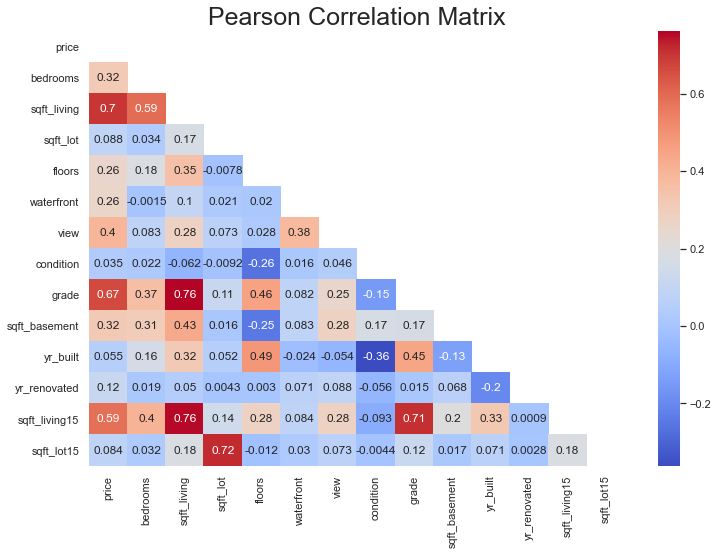

In [48]:
features = ['price', 'bedrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']

mask = np.zeros_like(kc_clean[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(12, 8))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(kc_clean[features].corr(),annot=True, cmap='coolwarm', 
            linecolor="w", mask = mask)

In [49]:
# Accordingly create a new list with the chosen numerical variables
continuous_clean = continuous.copy()
# Remove the four continuous variables defined above
for i in ['sqft_above', 'sqft_lot15', 'sqft_living15']:
    continuous_clean.remove(i)
# Create new categorical list and remove 'batrhooms'
categoricals_clean = categoricals.copy()
categoricals_clean.remove('bathrooms')
# Check list
print(continuous_clean)
print(categoricals_clean)

['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built']
['grade', 'zipcode', 'condition', 'waterfront', 'view', 'yr_renovated', 'bedrooms', 'floors']


#### What We Found

Here is a redone Pearson Correlation Matrix from Seaborn with a different color palette. Based on this information I assume that sqft_living, grade and sqft_living15 (which indicates the average house size in that area) will be most determinant of these categories. 

You may have also noticed that latitude and longitude have been dropped from this version. My reasoning for that is that it was the theyre significance is specific to the value and there is no correlation with the growth of either number with anything. Everything else on this list can, to some extent, be charecterized as getting better as the number describing it increases. Even the categoricals of view and waterfront are set to 0 being the worst and 1 being better. 

For tips on how to work with heatmaps in seaborn (like cutting the top half off) I used this link: https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f a lot of good material on there. And in terms of colorcodes, just play around with them till you find something that looks normal. 

### Dealing with Price Outliers

As this data set exhibits a very skewed distribution because of outliers we have decided to cut any house sold for more than $1,250,000. The graph still has a slight left skew but we only had to remove 881 lines, still leaving over 20,000 rows of data.

# Rows to drop= 881
# Rows remaining= 20200


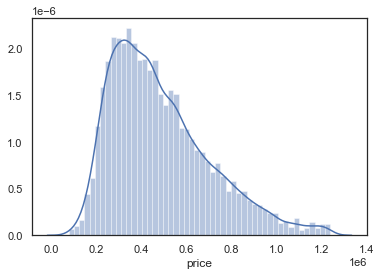

In [50]:
# Create new series with only prices below 
a = kc_clean.loc[kc_clean['price'] < 1250000]
# Check how many rows will be taken out
print("# Rows to drop=", len(kc_clean) - len(a['price']))
# Total rows remaining
print("# Rows remaining=", len(a))
# Distplot of price within the new DF
sns.distplot(a['price'])

In [51]:
# Update kc_clean as new dataset with price values of less than $1,250,000 
kc_clean = a
# Check it was succesful
len(kc_clean) == len (a)

True

### Normalize

Because of the range exhibited within this data-set, all continuous figures will be normalized for the sake of easier comparison. This will place all values within the same scale, and to do so we will be converting the variables to z-scores through a processes refered to as standardization. **Price will not be normalized** as our results will be more interpretable if price values are not changed. 

In [52]:
continuous_clean

['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built']

In [53]:
# Create copy of clean df and normalize numerical variables
kc_norm = kc_clean.copy()
kc_norm.drop(['sqft_above', 'sqft_lot15', 'sqft_living15', 'bathrooms'], axis = 1, inplace = True)
# Create a function to return a z-score for each number of the series entered
def z_normalize(feature):
    return (feature - feature.mean())/ feature.std()
# Iterate through list of numerical columns names except price
for x in continuous_clean[1:]:
    kc_norm[x] = z_normalize(kc_norm[x]) 
#Check whether this was succesful
kc_norm.describe()

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.020000e+04,2.020000e+04,20200.000000,2.020000e+04,2.020000e+04,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000,2.020000e+04,2.020000e+04,20200.000000,20200.000000,20200.000000,20200.000000
mean,4.598288e+09,4.854255e+05,3.337475,2.586710e-16,-2.406353e-16,1.479183,0.002921,0.180842,3.406584,7.555000,7.729626e-15,2.623325e-15,61.943911,98078.390198,47.557901,-122.213123
std,2.877195e+09,2.209394e+05,0.886343,1.000000e+00,1.000000e+00,0.536803,0.053967,0.659464,0.647162,1.059984,1.000000e+00,1.000000e+00,346.113523,53.355291,0.140545,0.141969
min,1.000102e+06,7.800000e+04,1.000000,-2.042984e+00,-3.523084e-01,1.000000,0.000000,0.000000,1.000000,3.000000,-6.555600e-01,-2.430722e+00,0.000000,98001.000000,47.155900,-122.519000
25%,2.126079e+09,3.160000e+05,3.000000,-7.472843e-01,-2.409397e-01,1.000000,0.000000,0.000000,3.000000,7.000000,-6.555600e-01,-6.472891e-01,0.000000,98033.000000,47.462700,-122.330000
50%,3.905080e+09,4.400000e+05,3.000000,-1.560424e-01,-1.778597e-01,1.000000,0.000000,0.000000,3.000000,7.000000,-6.555600e-01,1.072403e-01,0.000000,98065.000000,47.568250,-122.231000
75%,7.338000e+09,6.100000e+05,4.000000,5.861547e-01,-1.070922e-01,2.000000,0.000000,0.000000,4.000000,8.000000,6.019242e-01,8.617697e-01,0.000000,98118.000000,47.679700,-122.123000
max,9.900000e+09,1.240000e+06,11.000000,6.901121e+00,4.068604e+01,3.500000,1.000000,4.000000,5.000000,12.000000,5.922050e+00,1.513409e+00,2015.000000,98199.000000,47.777600,-121.315000


## Exploratory Data Analysis 

Let's take a look at the cleaned and normalized data to see what insights we can gain before starting with the regressions.

Generally Multicollinearity could fit in this section, but I found it more suitable for placing within the data Preprocessing section above as a intersection between Exploration and Data Cleaning. 

### Histograms

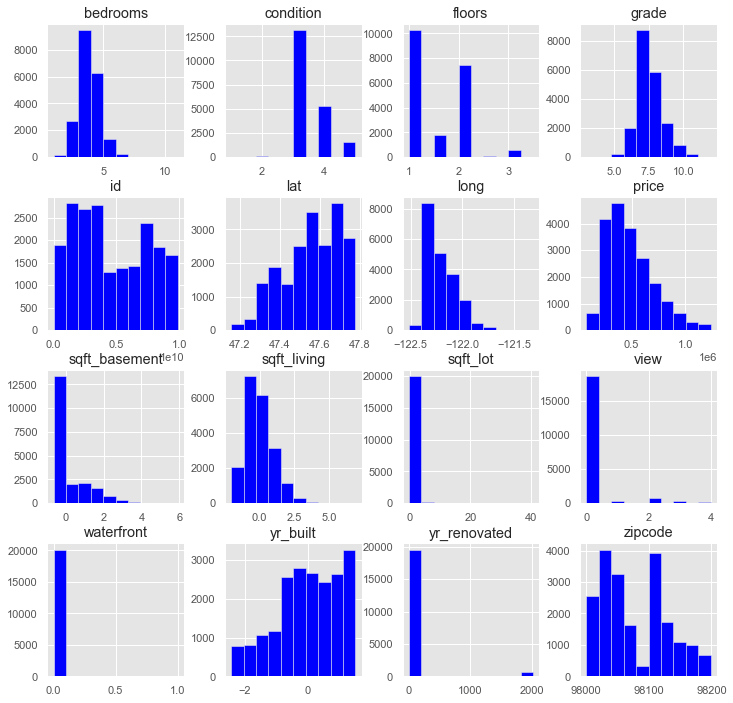

In [54]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
kc_norm.hist(ax = ax, color = 'blue');

### Joint Plots and Boxplots

Joint plots, from Seaborn, allow us to visualize a scatterplot of different independant variables against price while showing a Kernel Density Estimation for both variables in the margins and a simple linear regression. Boxplots will be used for categorical variables to determine the distribution of data against price

Unfortunately, as sns.jointplot does not take an axes argument, each of these joint plots will have to be printed out one after the other and may take up a large portion of your screen, but the insight they offer will be vital for this project.

#### Continuous

sqft_living vs price


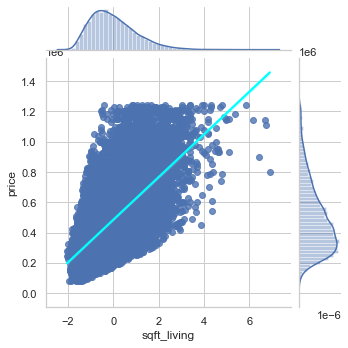

sqft_lot vs price


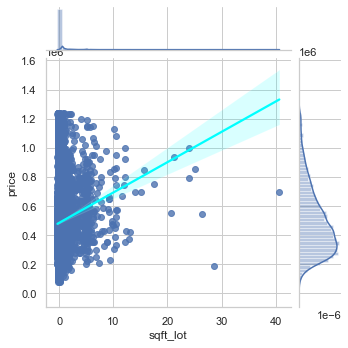

sqft_basement vs price


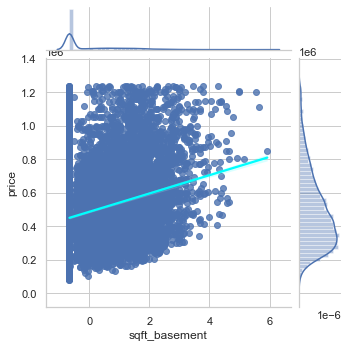

yr_built vs price


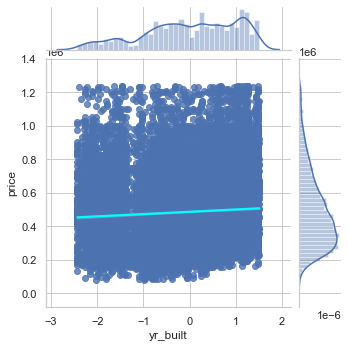

In [55]:
# As jointplot does not accept an axes subplot argument we have to print each chart individually
sns.set(style="whitegrid", color_codes=True)
for i in continuous_clean[1:]:
    print(f"{i} vs price")
    # plotted each independant continuous variable against price, set the height to be a little smaller (all jointplots are square)
    sns.jointplot(i, 'price', data = kc_norm, kind = 'reg', height = 5,
                 joint_kws={'line_kws':{'color':'cyan'}})
    # We did not put any titles as with joint plots they print half-under the top density chart
    plt.show()

In [56]:
continuous_final = ['sqft_living', 'sqft_lot']

#### Categorical

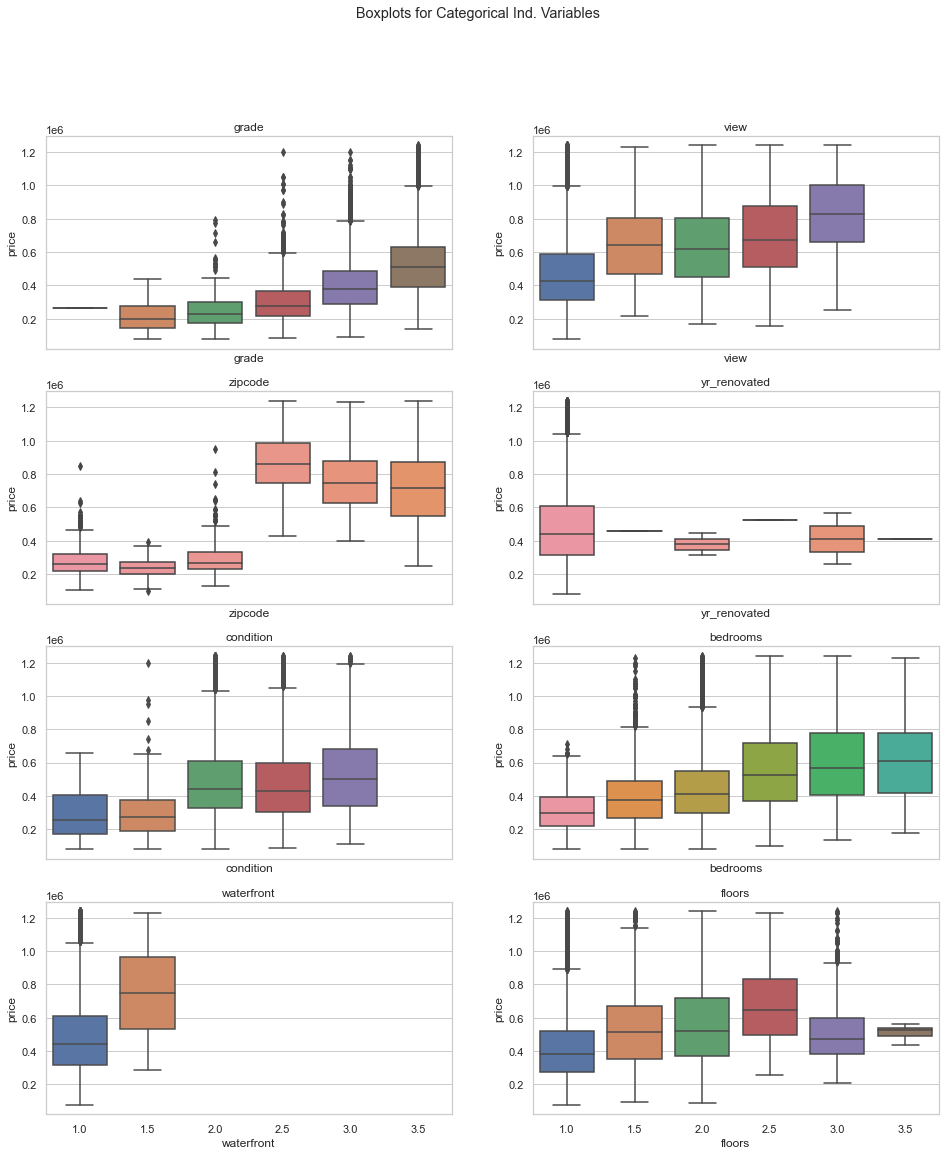

In [57]:
sns.set(style="whitegrid", font_scale=1)

fig, axes = plt.subplots(4, 2, sharex=True, figsize=(16,18))
fig.suptitle('Boxplots for Categorical Ind. Variables')

x_ax = 0
y_ax = 0

for n, i in enumerate(categoricals_clean):
    sns.boxplot(ax=axes[y_ax, x_ax], data=kc_norm, x= i, y='price')
    axes[y_ax, x_ax].set_title(i, {'fontsize': 12, 'fontweight' : 15})
    if n == 3:
        x_ax += 1
    y_ax += 1
    if y_ax == 4:
        y_ax = 0

grade vs price


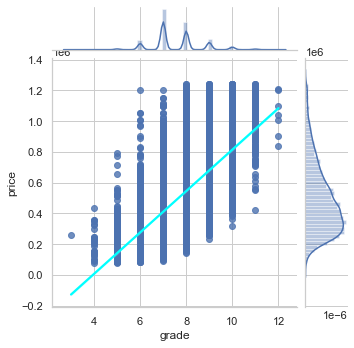

zipcode vs price


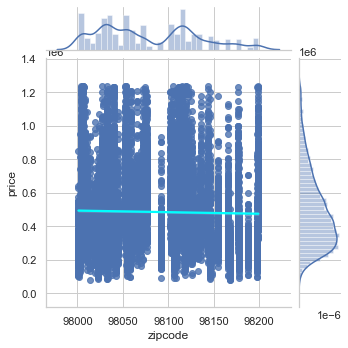

condition vs price


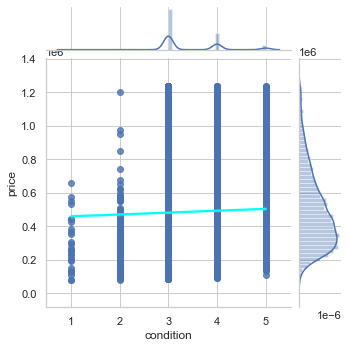

waterfront vs price


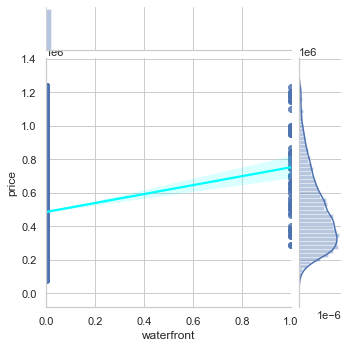

view vs price


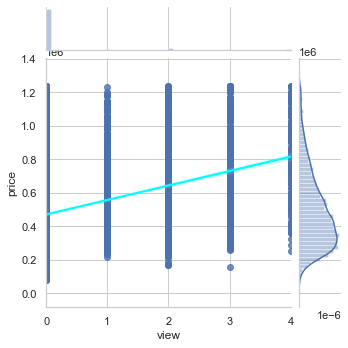

yr_renovated vs price


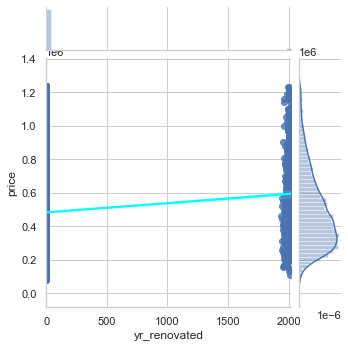

bedrooms vs price


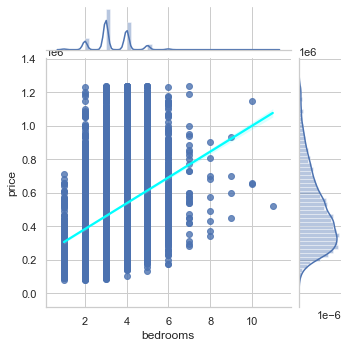

floors vs price


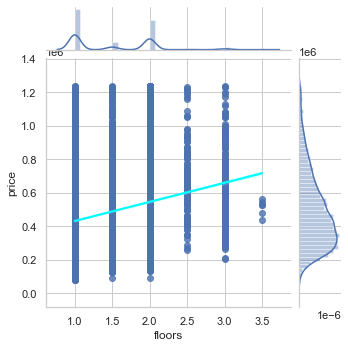

In [58]:
# same process as above except for categorical variables
# Joint plots have the added benefit of adding in a regresion line making correlation less about visual guesswork.
for i in categoricals_clean:
    print(f"{i} vs price")
    sns.jointplot(i, 'price', data = kc_norm, kind = 'reg', height = 5,
                 joint_kws={'line_kws':{'color':'cyan'}})
    plt.show()

In [59]:
categoricals_final = ['grade', 'waterfront', 'view', 'bedrooms']

### EDA Insights

From Continuous these variables have a positive correlation with price based on a primary assessment with jointplots and will form part of further assessments:
1. sqft_living
2. sqft_lot
3. sqft_basement

From Categoricals:
1. grade
2. waterfront
3. view
4. bedrooms

The other categoricals exhibit too small a correlation to pursue further. One thing I want to make clear is that the reason the significance from these categoricals can be determined with a jointplot is that the larger the quantity of the category is associated with being positive so they represent discrete numericals more so than pure categoricals, i.e. they are **oridnal categoricals**.

One variable that is a pure categorical is zipcode. This will be pulled from this section as the postcodes in King County do not really follow a logical pattern geographically: i.e. while the first three are next to each other, the next one is on the other side of the county. So we may be looking at it seperately and try to use binning (based on geogrpahy rather than value). Also, by doing the boxplot, we can see that there are specific zipcodes where there is a corerlation with higher price, which is another reason why jointplot does not work well for purely categorical values. 

### Final DataFrame

In [60]:
ind_vars_final = ['price'] + continuous_final + categoricals_final
kc_final = kc_norm[ind_vars_final]
kc_final.head()

,price,sqft_living,sqft_lot,grade,waterfront,view,bedrooms
0,221900,-1.024036,-0.224781,7,0,0,3
1,538000,0.724530,-0.185206,7,0,0,3
2,180000,-1.539800,-0.116644,6,0,0,2
3,604000,-0.042826,-0.240940,7,0,0,4
4,510000,-0.395055,-0.164374,8,0,0,3


### One Hot Encoding

Turn all the category variables into binary

In [61]:
# Checking whether there are any variables with too many unique values that might need to be binned
kc_final[categoricals_final].nunique()
# All good

grade         10
waterfront     2
view           5
bedrooms      11
dtype: int64

In [62]:
#Don't include prod_id, set_name, prod_desc, or prod_long_desc; they are too unique
def one_h_e(df, categories):
    # 
    df_ohe = df[categories].astype('category')
    
    df_ohe = pd.get_dummies(df_ohe, drop_first = True)
    
    df_done = pd.concat([df, df_ohe], axis = 1)
    
    df_done = df_done.drop(categories, axis = 1)
    
    return df_done

In [63]:
kc_ohe_final = one_h_e(kc_final, categoricals_final)
kc_ohe_final.head()

,price,sqft_living,sqft_lot,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,waterfront_1,view_1,view_2,view_3,view_4,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11
0,221900,-1.024036,-0.224781,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,538000,0.724530,-0.185206,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,180000,-1.539800,-0.116644,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,604000,-0.042826,-0.240940,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,510000,-0.395055,-0.164374,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Model  - Linear Regression

### Train-Test Split with One-Hot Encoding

To make sure that we are not over or underfitting our regression models, we have to seperate the data into two portions. The first consists of the majority of the data and will be used to train the linear regression. This can range between 70 and 85 percent, but in this instance we have chosen 75%. The data has sufficient data points that I am comfortable choosing a smaller training portion. The train and test splits will then be concated into new dataframes

In [100]:
# Create Dataframe with usable independant variables
X = kc_ohe_final.drop(['price'], axis =1)
# Create Dataframe with the dependant variable
y = kc_ohe_final['price']
# Split both into 75/25 train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.75, random_state = 1)
# Check the lengths of each split
print(len(X_train), len(X_test), len(y_train), len(y_test))
# Create a new training set Dataframe w/ features and target
kc_train = pd.concat([X_train, y_train], axis = 1)
# Test Dataframe
kc_test = pd.concat([X_test, y_test], axis = 1)

15150 5050 15150 5050


### Train-Test Split without One-Hot Encoding

This section was added after a few models were already fit but we determined that ordinal categories would be better served without one-hot encoding. 

In [99]:
# Same process as above
X_final = kc_final.drop(['price'], axis =1)
y_final = kc_final['price']
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(
    X_final, y_final, train_size = 0.75, random_state = 2)
print(len(X_final_train), len(X_final_test), len(y_final_train), len(y_final_test))
kc_train_final = pd.concat([X_final_train, y_final_train], axis = 1)
kc_test_final = pd.concat([X_final_test, y_final_test], axis = 1)

15150 5050 15150 5050


### Train-Test Split using KC Clean 

Non-normalized, and without dropping columns that visually seemed irrelevant. This is primarily for the use of stepwise selection. We did not use any one-hot encoding and zipcode was dropped as it created issues with the stepwise selection formula below.

In [136]:
kc_trial = kc_clean.copy()
# Drop categories
kc_trial.drop(['lat', 'long', 'date', 'id', 'zipcode'], axis = 1, inplace = True)
# Same process as above for the rest
X_trial = kc_trial.drop(['price'], axis =1)
y_trial = kc_trial['price']
X_trial_train, X_trial_test, y_trial_train, y_trial_test = train_test_split(
    X_trial, y_trial, train_size = 0.75, random_state = 3)
print(len(X_trial_train), len(X_trial_test), len(y_trial_train), len(y_trial_test))
kc_train_trial = pd.concat([X_trial_train, y_trial_train], axis = 1)
kc_test_trial = pd.concat([X_trial_test, y_trial_test], axis = 1)

15150 5050 15150 5050


### Fitting an Initial Model

As we have already normalized and one-hot encoded out data, we can go straight into fitting our model using ols from statsmodels.formula.api

In [65]:
outcome = 'price'
x_cols = [i for i in X.columns]

In [66]:
outcome = 'price'
x_cols = [i for i in X.columns]

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     632.9
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:38:15   Log-Likelihood:            -2.0255e+05
No. Observations:               15150   AIC:                         4.051e+05
Df Residuals:                   15124   BIC:                         4.053e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.073e+05   1.55e+05      2.626      0.009    1.03e+05    7.11e+05
sqft_living    7.84e+04   2266.041     34.599      0.000     7.4e+04    8.28e+04
sqft_lot     -2468.1715   1287.770     -1.917      0.055   -4992.356      56.013
grade_4      -9.203e+04   1.59e+05     -0.580      0.562   -4.03e+05    2.19e+05
grade_5       -6.57e+04   1.56e+05     -0.421      0.674   -3.71e+05     2.4e+05
grade_6      -1.898e+04   1.56e+05     -0.122      0.903   -3.24e+05    2.86e+05
grade_7       4.285e+04   1.56e+05      0.275      0.783   -2.62e+05    3.48e+05
grade_8       1.198e+05   1.56e+05      0.770      0.442   -1.85e+05    4.25e+05
grade_9       2.311e+05   1.56e+05      1.484      0.138   -7.42e+04    5.36e+05
grade_10      3.056e+05   1.56e+05      1.961      0.050      71.404    6.11e+05
grade_11      3.924e+05   1.56e+05      2.509      0.012    8.58e+04    6.99e+05
grade_12      2.695e+05   1.71e+05      1.579      0.114   -6.51e+04    6.04e+05
waterfront_1  7.709e+04   2.63e+04      2.929      0.003    2.55e+04    1.29e+05
view_1        1.159e+05   1.08e+04     10.768      0.000    9.48e+04    1.37e+05
view_2        9.084e+04   6513.988     13.945      0.000    7.81e+04    1.04e+05
view_3        1.061e+05   9432.491     11.248      0.000    8.76e+04    1.25e+05
view_4        2.038e+05   1.65e+04     12.327      0.000    1.71e+05    2.36e+05
bedrooms_2    1.294e+04    1.4e+04      0.926      0.354   -1.44e+04    4.03e+04
bedrooms_3   -3.002e+04   1.39e+04     -2.161      0.031   -5.73e+04   -2784.763
bedrooms_4   -3.076e+04   1.42e+04     -2.166      0.030   -5.86e+04   -2918.340
bedrooms_5   -1.972e+04   1.51e+04     -1.309      0.190   -4.93e+04    9806.653
bedrooms_6   -8514.5101   1.89e+04     -0.450      0.653   -4.56e+04    2.86e+04
bedrooms_7   -5.064e+04   3.56e+04     -1.424      0.154    -1.2e+05    1.91e+04
bedrooms_8   -2.612e+04   6.04e+04     -0.432      0.666   -1.45e+05    9.23e+04
bedrooms_9    5.557e+04   9.09e+04      0.612      0.541   -1.23e+05    2.34e+05
bedrooms_10   1.076e+05   9.08e+04      1.185      0.236   -7.04e+04    2.86e+05
bedrooms_11           0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1173.116   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1645.469
Skew:                           0.649   Prob(JB):                         0.00
Kurtosis:                       3.959   Cond. No.                     1.30e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-28. This might indicate that there are


In [67]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
# skipped the first one as it was "Intercept"
print(x_cols[1:])
p_table.head(4)

27 10
['sqft_living', 'grade_11', 'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4', 'bedrooms_3', 'bedrooms_4']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,4.073e+05,1.55e+05,2.626,0.009,1.03e+05,7.11e+05
sqft_living,7.84e+04,2266.041,34.599,0.000,7.4e+04,8.28e+04
sqft_lot,-2468.1715,1287.770,-1.917,0.055,-4992.356,56.013
grade_4,-9.203e+04,1.59e+05,-0.580,0.562,-4.03e+05,2.19e+05


In [68]:
# Join all the ind. variables with a plus sign
predictors = '+'.join(x_cols[1:])
# Create a multivariable equation using predictors above and ~
formula = outcome + "~" + predictors
# Fit an Ordinary Least Squares Model on training data
model = ols(formula=formula, data=kc_train).fit()
# Print a summary of said model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     1304.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:38:15   Log-Likelihood:            -2.0363e+05
No. Observations:               15150   AIC:                         4.073e+05
Df Residuals:                   15140   BIC:                         4.073e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.901e+05   2956.956    165.746      0.000    4.84e+05    4.96e+05
sqft_living   1.345e+05   1543.582     87.137      0.000    1.31e+05    1.38e+05
grade_11      1.512e+05   1.51e+04     10.010      0.000    1.22e+05    1.81e+05
waterfront_1  6.294e+04   2.82e+04      2.231      0.026    7653.406    1.18e+05
view_1        1.157e+05   1.15e+04     10.030      0.000    9.31e+04    1.38e+05
view_2        1.002e+05   6975.298     14.362      0.000    8.65e+04    1.14e+05
view_3        1.116e+05   1.01e+04     11.074      0.000    9.19e+04    1.31e+05
view_4        2.172e+05   1.77e+04     12.268      0.000    1.82e+05    2.52e+05
bedrooms_3   -1.645e+04   3495.619     -4.707      0.000   -2.33e+04   -9602.722
bedrooms_4    -2.14e+04   3967.877     -5.393      0.000   -2.92e+04   -1.36e+04
==============================================================================
Omnibus:                      903.759   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1124.897
Skew:                           0.588   Prob(JB):                    5.39e-245
Kurtosis:                       3.633   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Normally, at this point we might have to remove features that exhibit Multicollinearity through their eigenvalue. However, we have already done so above using a Pearson Correlation Matrix. 

### Check for Normality 

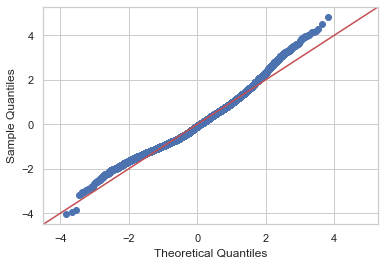

In [69]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

This represents an almost normal 

The model was succesful at predicting house prices based on the features specified.

### Homoscedasticity

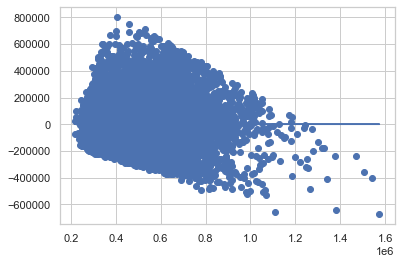

In [70]:
plt.scatter(model.predict(kc_train[x_cols[1:]]), model.resid)
plt.plot(model.predict(kc_train[x_cols[1:]]), [0 for i in range(len(kc_train))])

#### I don't think this is very homoscedastic

### Regression Model Validation

**Mean Squared Error** also **MSE** is a non-negative measure of the quality of an estimator. The closer MSE is to 0 the better. MSE is calculated by finding the average square difference between the estimated value genereted and the actual value. 

MSE will be calculated using the mean_squared_error function from sklearn.metrics (imported above).

In [71]:
kc_test.head()

,sqft_living,sqft_lot,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,waterfront_1,view_1,view_2,view_3,view_4,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,price
3376,-0.105724,-0.052110,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,415000
16082,0.020072,-0.184659,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,465000
6776,0.321983,-0.214490,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,398500
11110,0.812588,-0.188835,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,632500
19265,-0.067985,-0.289166,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,628000


In [72]:
# Initialize the linear regression tool from sklearn against training data
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# Calculate predictions for y against training and test lists 
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
# Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
# Calculate training and test Mean Squared Error using  'mean_squared_error' from sklearn
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 23996723463.19344
Test Mean Squarred Error: 23618617715.884827


### Selecting Appropriate Features

Below we will be using stepwise selection to select the most appropriate independant variables. 

In [138]:
# This equation was copied from the curriculum
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [74]:
result = stepwise_selection(X_train, y_train, verbose = False)
print("Selected Features:")
print(result)

Selected Features:
['grade_10', 'sqft_living', 'grade_9', 'grade_8', 'grade_11', 'view_4', 'view_2', 'grade_7', 'view_3', 'view_1', 'bedrooms_2', 'grade_12', 'grade_6', 'waterfront_1']


In [75]:
X_fin = X_train[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y_train,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1128.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:37:31   Log-Likelihood:            -2.0256e+05
No. Observations:               15150   AIC:                         4.051e+05
Df Residuals:                   15135   BIC:                         4.053e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.158e+05   1.18e+04     26.860      0.000    2.93e+05    3.39e+05
grade_10       3.66e+05   1.42e+04     25.812      0.000    3.38e+05    3.94e+05
sqft_living   7.907e+04   1935.226     40.858      0.000    7.53e+04    8.29e+04
grade_9       2.926e+05   1.28e+04     22.862      0.000    2.68e+05    3.18e+05
grade_8       1.821e+05    1.2e+04     15.138      0.000    1.59e+05    2.06e+05
grade_11      4.519e+05   1.92e+04     23.597      0.000    4.14e+05    4.89e+05
view_4        2.052e+05   1.65e+04     12.422      0.000    1.73e+05    2.38e+05
view_2        9.086e+04   6507.404     13.963      0.000    7.81e+04    1.04e+05
grade_7       1.058e+05   1.18e+04      9.000      0.000    8.27e+04    1.29e+05
view_3        1.045e+05   9400.055     11.121      0.000    8.61e+04    1.23e+05
view_1        1.159e+05   1.08e+04     10.772      0.000    9.48e+04    1.37e+05
bedrooms_2    4.192e+04   4126.101     10.160      0.000    3.38e+04       5e+04
grade_12      3.293e+05    7.1e+04      4.637      0.000     1.9e+05    4.69e+05
grade_6       4.495e+04   1.21e+04      3.704      0.000    2.12e+04    6.87e+04
waterfront_1  7.571e+04   2.63e+04      2.878      0.004    2.41e+04    1.27e+05
==============================================================================
Omnibus:                     1182.617   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1656.504
Skew:                           0.654   Prob(JB):                         0.00
Kurtosis:                       3.956   Cond. No.                         65.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-Squared value here is closer to one meaning that the Linear Regression created with stepwise selected features are a better fit than the previous model. Additionally, having a very small difference between R-squared and Adj. R-squared suggests that there is no overlap with the features selected. 

The F-statistic is high and the P-value (Prob (F-statistic)) is zero (or near enough) meaning that we are able to rejecet the null hypothesis. 

However, let's see if we can refine the model further to make more accurate predictions. 

### Note, this was originally done with ordinal categories being one hot encoded. What would happen if they did not have dummy variables.

### Stepwise Selection Using KC Clean

Using stepwise selection on the un-hot-encoded version of the Final KC Dataframe led to a lower R Score. However, the important point here is that stepwise selction should be used on ALL the features present in a dataset to determine which are the most useful. The code for this has been removed in favor of stepwise selection that was run on a post-multicollinearity cut dataframe. 

In [141]:
result = stepwise_selection(X_trial_train, y_trial_train, verbose = False)
print("Selected Features:")
print(result)

X_trial_fin = X_trial_train[result]
X_with_intercept_trial = sm.add_constant(X_trial_fin)
model1 = sm.OLS(y_trial_train,X_with_intercept_trial).fit()
model1.summary()

Selected Features:
['sqft_living15', 'grade', 'yr_built', 'sqft_living', 'floors', 'view', 'bathrooms', 'condition', 'sqft_above', 'sqft_basement', 'bedrooms', 'waterfront', 'sqft_lot15', 'sqft_lot']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1721.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:34:34   Log-Likelihood:            -2.0104e+05
No. Observations:               15150   AIC:                         4.021e+05
Df Residuals:                   15136   BIC:                         4.022e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.84e+06   1.04e+05     46.476      0.000    4.64e+06    5.04e+06
sqft_living15    56.3664      2.992     18.842      0.000      50.503      62.230
grade          9.551e+04   1797.799     53.129      0.000     9.2e+04     9.9e+04
yr_built      -2773.0373     53.803    -51.541      0.000   -2878.497   -2667.578
sqft_living      48.5277      2.064     23.509      0.000      44.482      52.574
floors         5.413e+04   2996.503     18.064      0.000    4.83e+04       6e+04
view             2.4e+04   1918.249     12.510      0.000    2.02e+04    2.78e+04
bathrooms      3.067e+04   2755.079     11.131      0.000    2.53e+04    3.61e+04
condition      1.794e+04   1904.815      9.417      0.000    1.42e+04    2.17e+04
sqft_above        8.5910      1.961      4.382      0.000       4.748      12.434
sqft_basement    39.9366      2.269     17.599      0.000      35.489      44.385
bedrooms      -1.462e+04   1691.962     -8.643      0.000   -1.79e+04   -1.13e+04
waterfront     1.609e+05   2.24e+04      7.193      0.000    1.17e+05    2.05e+05
sqft_lot15       -0.3084      0.061     -5.090      0.000      -0.427      -0.190
sqft_lot          0.1181      0.040      2.931      0.003       0.039       0.197
==============================================================================
Omnibus:                      917.113   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1528.116
Skew:                           0.484   Prob(JB):                         0.00
Kurtosis:                       4.219   Cond. No.                     1.32e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.05e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Select 5 Best Feautres using Recurvise Feature Elimination

Now we will use the RFE tool from sklearn to determine which five features are the most important

In [67]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X_train, y_train.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [68]:
selected_columns = X.columns[selector.support_ ]

In [69]:
selected_columns

Index(['grade_10', 'grade_11', 'grade_12', 'grade_13', 'waterfront_1'], dtype='object')

In [61]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X_train[result].shape[1]-1)
print(f"R-Squared: {r_squared}")
print(f"Adjusted R-Squared: {adjusted_r_squared}")

R-Squared: 0.6734196713942765
Adjusted R-Squared: 0.6731250497598096


### Regression Model Validation

**Mean Squared Error** also **MSE** is a non-negative measure of the quality of an estimator. The closer MSE is to 0 the better. MSE is calculated by finding the average square difference between the estimated value genereted and the actual value. 

MSE will be calculated using the mean_squared_error function from sklearn.metrics (imported above).

In [49]:
kc_test.head()

,sqft_living,sqft_lot,yr_built,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,waterfront_1,view_1,view_2,view_3,view_4,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,price
19361,0.293742,-0.191260,0.613011,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.273333
21510,-0.512470,-0.274783,1.397368,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.682341
17046,1.110849,-0.127580,-0.716988,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.435616
15654,3.366064,-0.191406,0.919933,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,3.107806
18054,-0.610522,-0.103949,-0.614680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.450570


In [50]:
# Initialize the linear regression tool from sklearn against training data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [51]:
# Calculate predictions for y against training and test lists 
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [52]:
# Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [53]:
# Calculate training and test Mean Squared Error using  'mean_squared_error' from sklearn
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.32202839245332826
Test Mean Squarred Error: 0.33927563134185007


### Cross-Validation


In [89]:
maxpr

id               6762700020
date             10/13/2014
price               7.7e+06
bedrooms                  6
bathrooms                 8
sqft_living           12050
sqft_lot              27600
floors                  2.5
waterfront                0
view                      3
condition                 4
grade                    13
sqft_above             8570
sqft_basement        3480.0
yr_built               1910
yr_renovated           1987
zipcode               98102
lat                 47.6298
long               -122.323
sqft_living15          3940
sqft_lot15             8800
Name: 7245, dtype: object

In [88]:
# find the row of the house which has the highest price
maxpr=kc_clean.loc[kc_norm['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

kc_copy = kc_norm.copy()
# select a zipcode for the heatmap
set(kc['zipcode'])
df_copy = kc[kc['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

### Pairplot Visualization

EXPLAIN

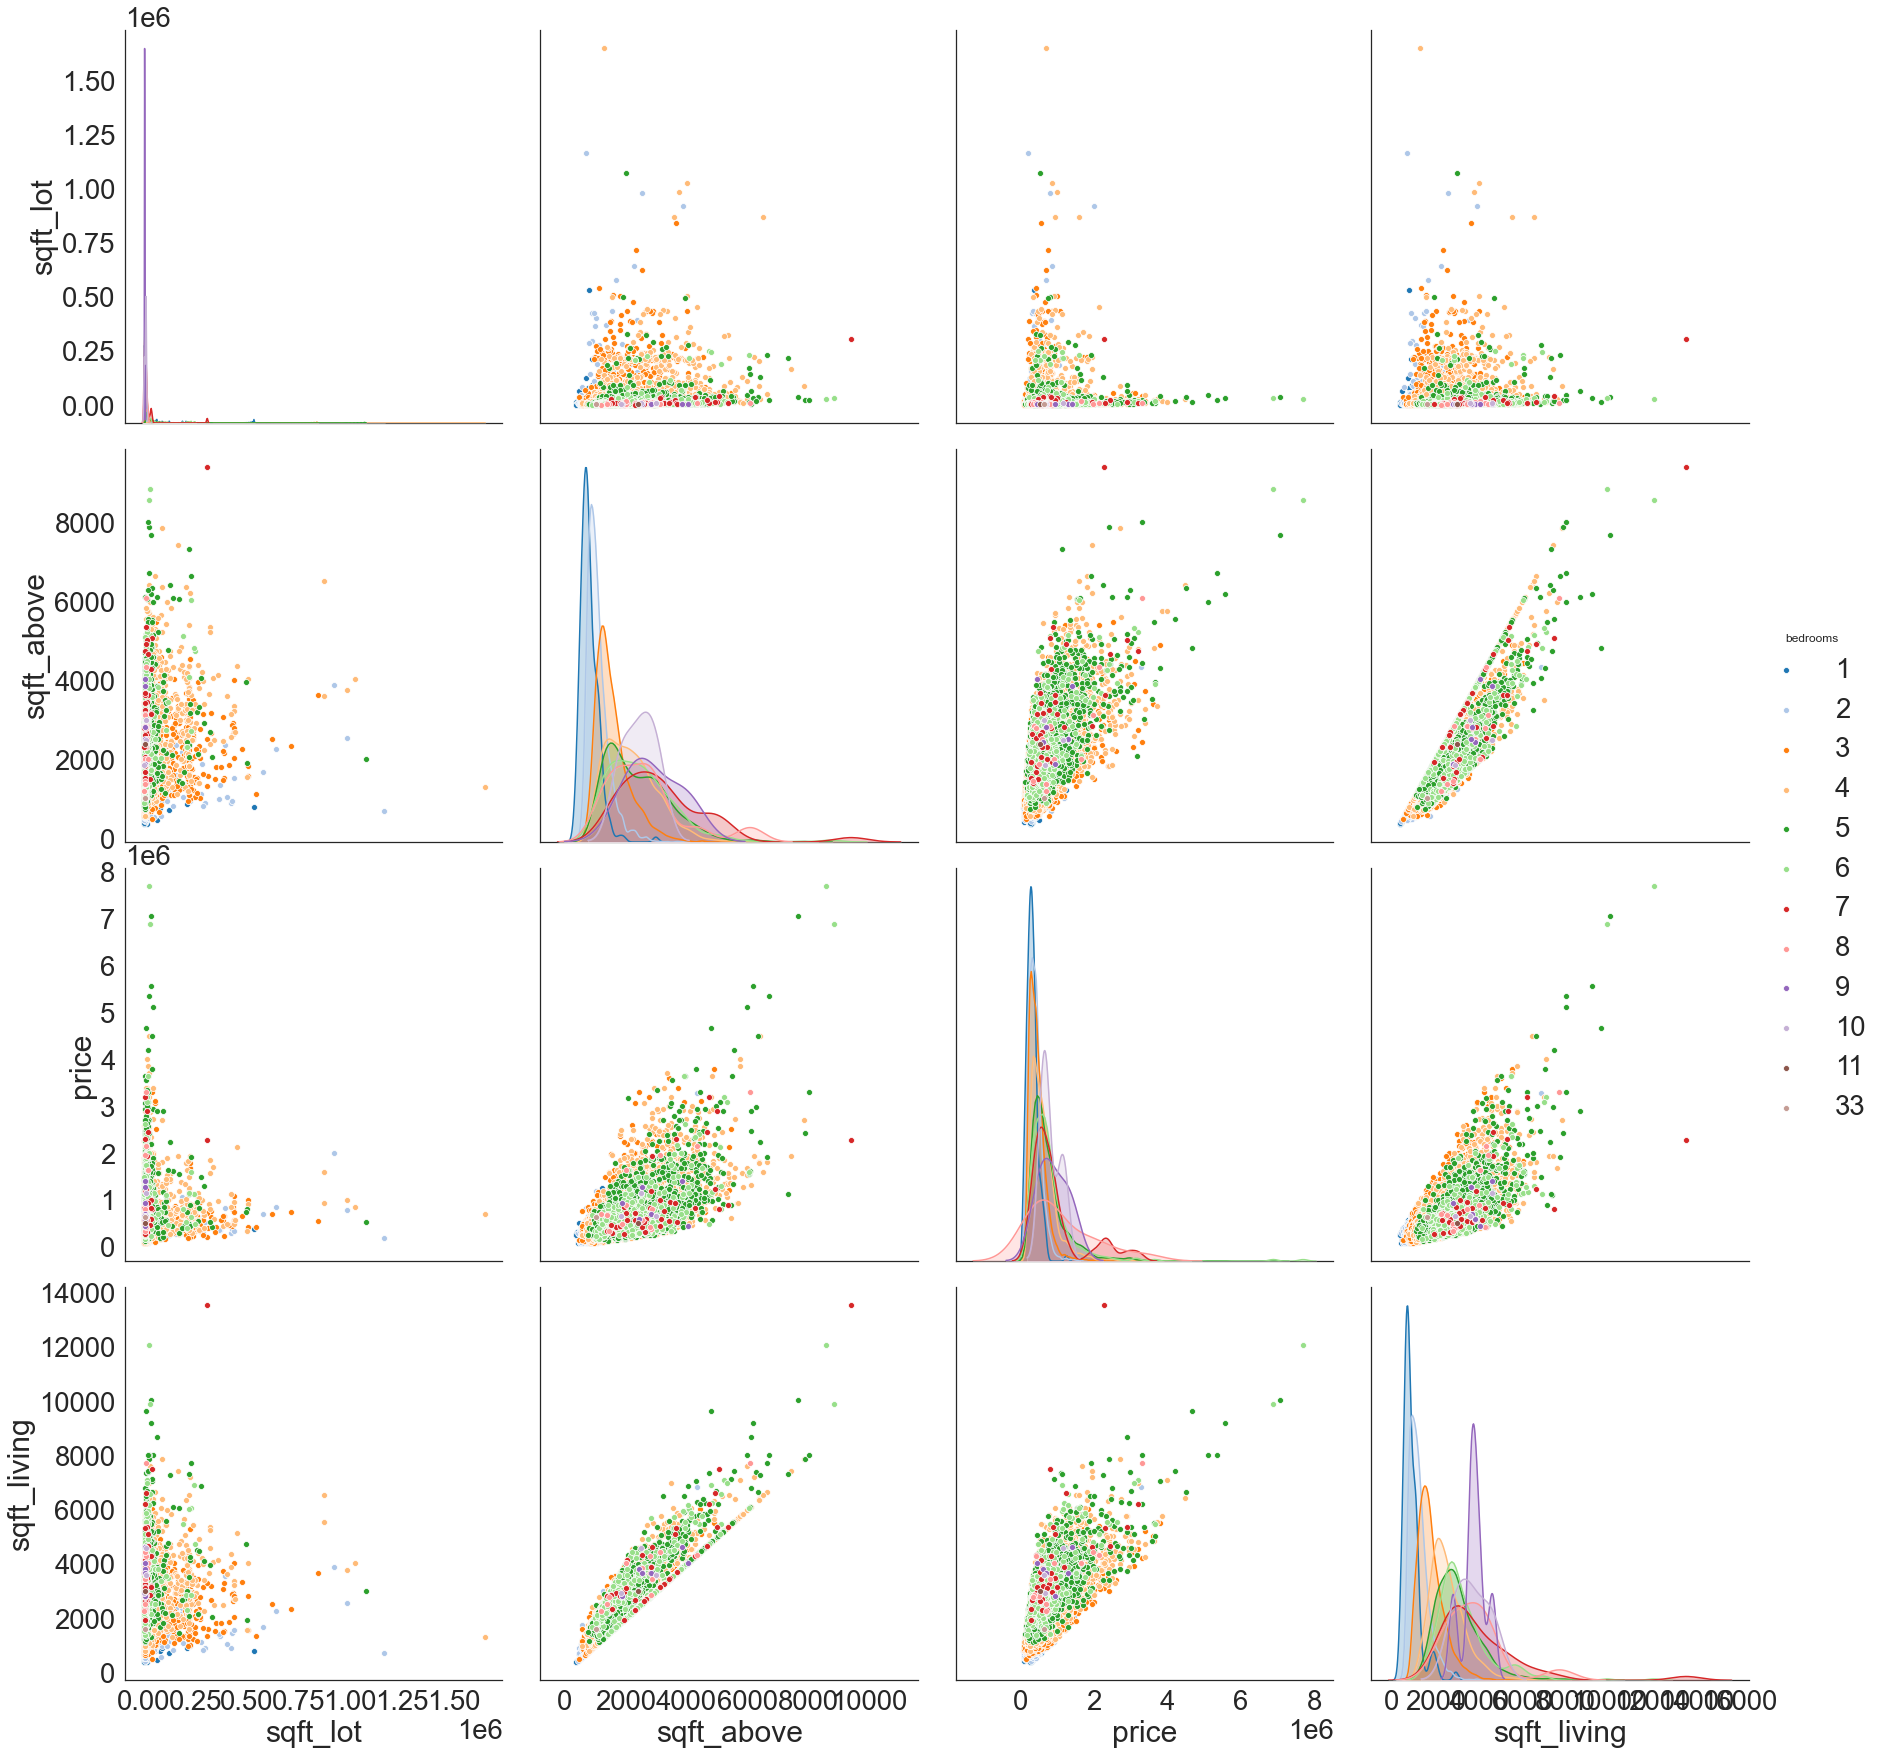

In [19]:
with sns.plotting_context("notebook",font_scale=2.5):
    a = sns.pairplot(kc_clean[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)

### Messing around with Zipcodes

We are going to try binning some zipcodes together to make them more categorical

In [87]:
a = np.sort(kc_norm['zipcode'].unique())
a

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=int64)

In [ ]:
[98001, 98003, ]

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])

In [31]:
coeff_df

,Coefficient
sqft_living,0.399545
sqft_lot,-0.037367
yr_built,-0.228321
grade_4,-0.170765
grade_5,-0.152210
grade_6,-0.018654
grade_7,0.254357
grade_8,0.544472
grade_9,0.955264
grade_10,1.458124


In [43]:
y_hat = lm.predict(X_test)

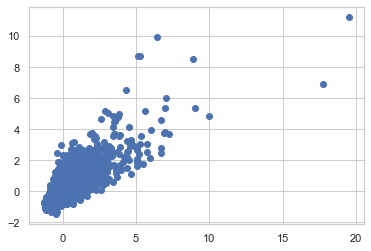

In [44]:
plt.scatter(y_test, y_hat)

In [52]:
# Mean Squared Error
print(np.mean((y_hat - y_test)**2))
# Number seems  very low, indicates high accuracy ???

0.33927563134184935


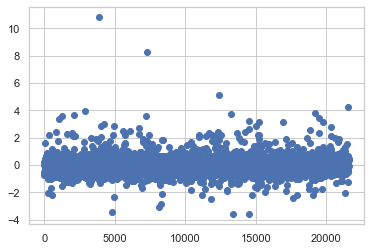

In [46]:
# Error plot
plt.plot((y_test - y_hat), marker = 'o', linestyle = "")

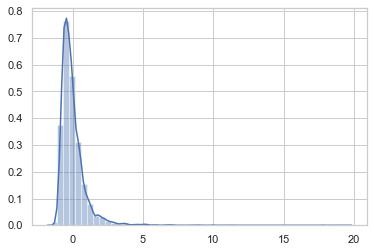

In [36]:
sns.distplot((y_test, predictions), bins = 50)

In [54]:
# Calculate predictions for y against training and test lists 
y_hat_train = lm.predict(X_train)
y_hat_test = lm.predict(X_test)

In [55]:
# Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [56]:
# Calculate training and test Mean Squared Error using  'mean_squared_error' from sklearn
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.32202839245332826
Test Mean Squarred Error: 0.33927563134185007


## Question 1: 

### With which single feature is it the easiest to predict House Prices in King County, Washington?

Square Footage of Living Space

As exepcted, the single feature that had the highest t-scores on every variation of model we fit in this project. 

The reason we used t-score is that p-values tend to be 0.000 on the model.summary because they are each very likely to reject the null hypothesis while the t score grows as the feature is likely to reject the null hypothesis. 

### The t-score of sqft_living was double the height of any other feature

## Question 2:

### Which five features?